# K-mean

In [27]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
x,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=51)
import warnings
warnings.filterwarnings('ignore')



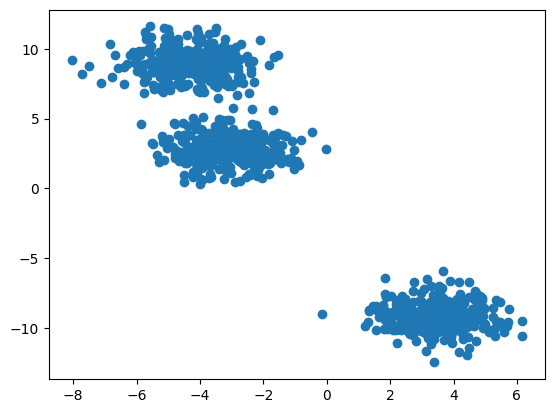

In [28]:
plt.scatter(x[:,0],x[:,1])

### Elbow curve

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


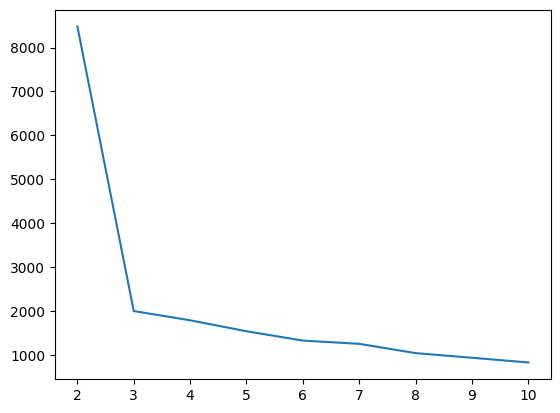

In [30]:
plt.plot(range(2,11),wcss)

### silhouette score

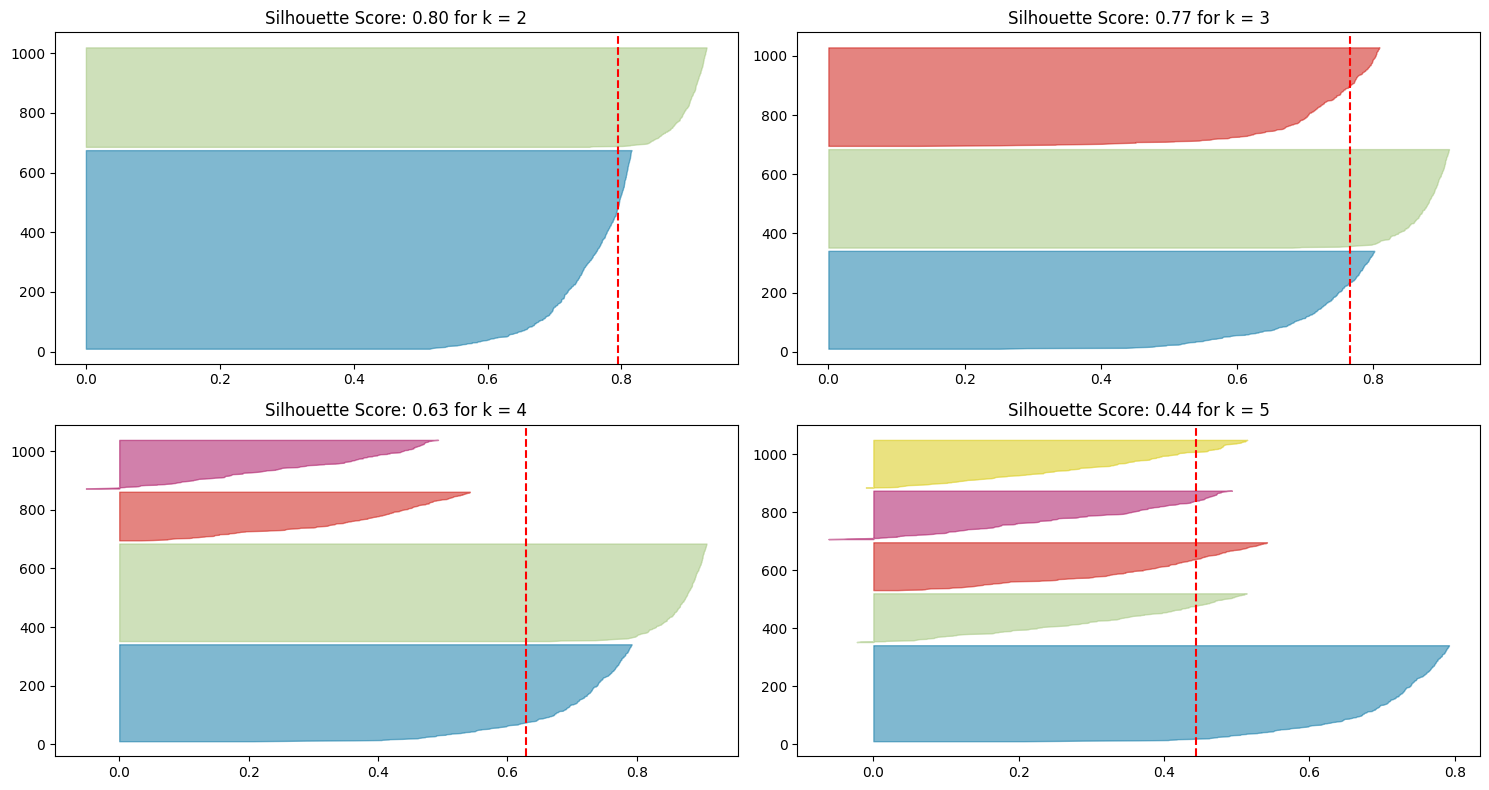

In [31]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

silhouett_scores = []

# Calculate silhouette scores
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    labels = kmeans.labels_
    score = silhouette_score(x, labels)
    silhouett_scores.append(score)

# Plot Silhouette Visualizers with titles
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax = ax.flatten()  

for idx, i in enumerate(range(2, 6)):
    km = KMeans(n_clusters=i, random_state=0)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[idx])
    visualizer.fit(x)
    ax[idx].set_title(f"Silhouette Score: {silhouett_scores[idx]:.2f} for k = {i}")

plt.tight_layout()
plt.show()
plt.rcdefaults()


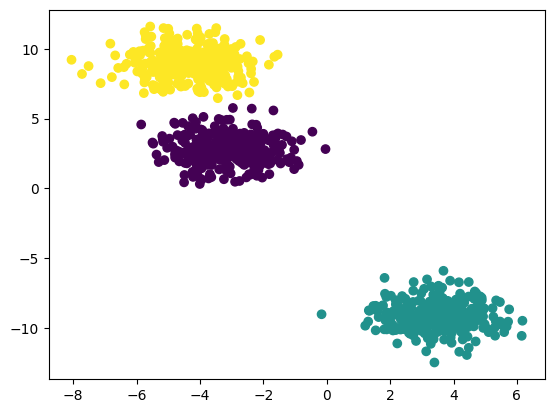

In [32]:
from sklearn.metrics import confusion_matrix
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
label=kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=label)

In [33]:
label[:10]

array([0, 0, 2, 0, 2, 2, 0, 0, 0, 0], dtype=int32)

In [34]:
y[:10]

array([1, 1, 2, 1, 2, 2, 1, 1, 1, 1])

# Agglomerative Clustering


In [35]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

In [36]:
linkage_data=linkage(x,method='ward',metric='euclidean')

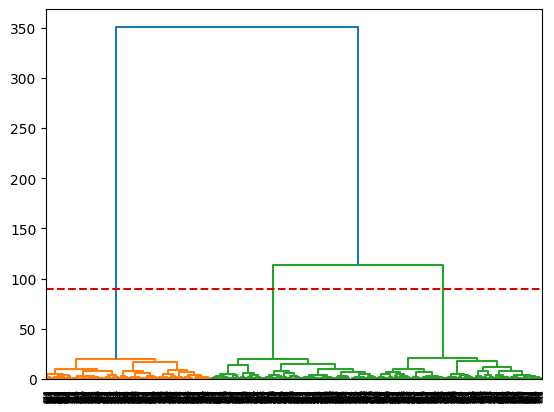

In [54]:
dendrogram(linkage_data);
plt.axhline(90,c='r',ls='--');

In [38]:
hr_cluster=AgglomerativeClustering(n_clusters=3,linkage='ward')
hr_predict=hr_cluster.fit_predict(x)


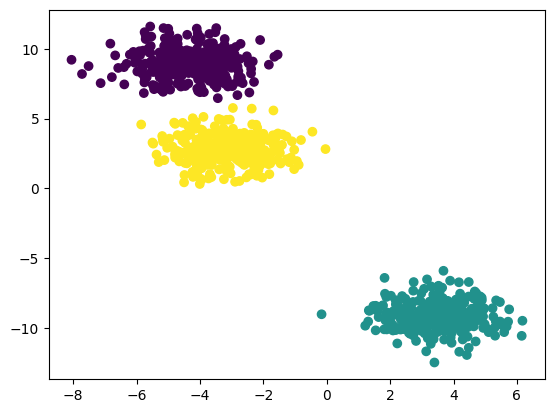

In [39]:
plt.scatter(x[:,0],x[:,1],c=hr_predict)

# PCA

In [40]:
from  sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x,y=make_blobs(n_samples=1000,n_features=8,centers=3)
from sklearn.decomposition  import PCA


In [41]:
pca=PCA()
pca_df=pd.DataFrame(pca.fit_transform(x))
pca.explained_variance_

array([127.71950834,  64.18873304,   1.09316903,   1.04272771,
         1.00295454,   0.97103944,   0.9204751 ,   0.84450086])

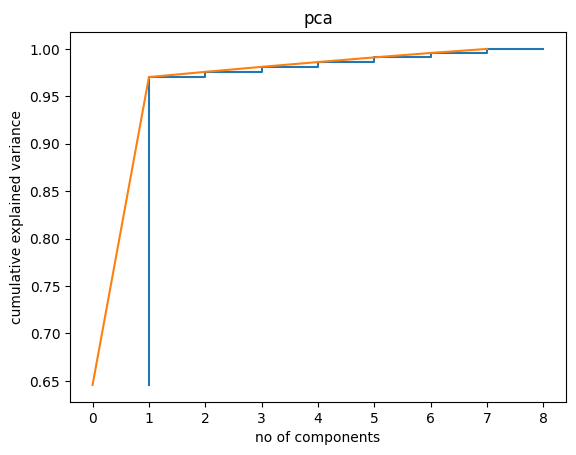

In [42]:
plt.step((range(1,9)),np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.title('pca')
plt.show()

# DBSCAN


In [43]:
from sklearn.datasets import make_circles,make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [44]:
#x,_=make_circles(n_samples=750,factor=.5,noise=.03,random_state=4)
#plt.scatter(x[:,0],x[:,1])

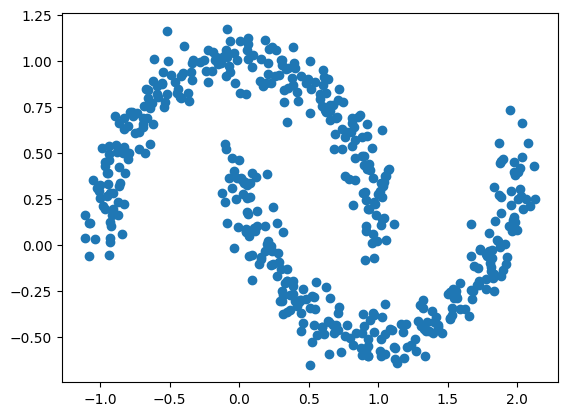

In [45]:
x,_=make_moons(n_samples=500,noise=.08,random_state=4)
plt.scatter(x[:,0],x[:,1])

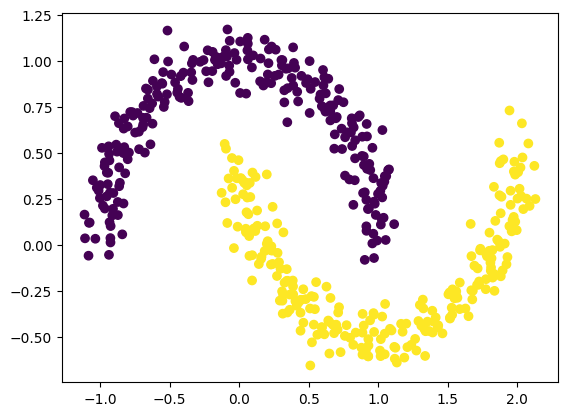

In [46]:
dbscan =DBSCAN(eps=0.2
               ,min_samples=5)
clusters=dbscan.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=clusters)

In [47]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)


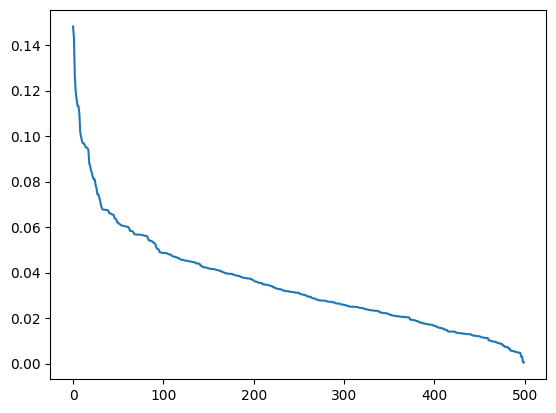

In [48]:
distances=sorted(distances[:,1],reverse=True)
plt.plot(distances)

In [49]:
# min_samples=2*colomns+1


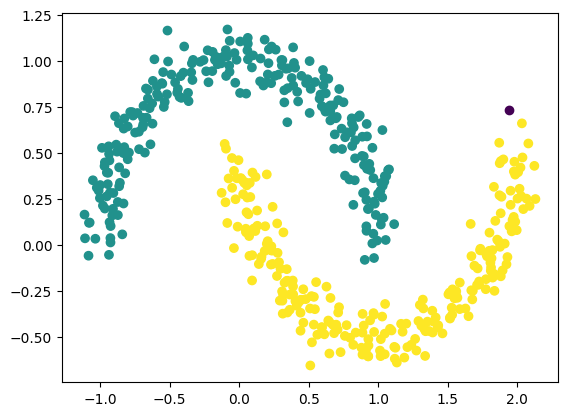

In [50]:
dbscan =DBSCAN(eps=0.15,min_samples=5)
clusters=dbscan.fit_predict(x)
plt.scatter(x[:,0],x[:,-1],c=clusters)